In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("complete")

/kaggle/input/cvpdfdata/agaspar_cv.pdf
complete


In [2]:
!apt-get install poppler-utils -y
!pip install pdf2image
!pip install easyocr
print("complete")




The following additional packages will be installed:
  libpoppler97 poppler-data
Suggested packages:
  ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  libpoppler97 poppler-data poppler-utils
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 2563 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 poppler-data all 0.4.9-2 [1475 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libpoppler97 amd64 0.86.1-0ubuntu1 [915 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 poppler-utils amd64 0.86.1-0ubuntu1 [174 kB]
Fetched 2563 kB in 1s (3093 kB/s)
Selecting previously unselected package poppler-data.
(Reading database ... 106350 files and directories currently installed.)
Preparing to unpack .../poppler-

In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

reader = easyocr.Reader(['en'])
print("complete")

complete


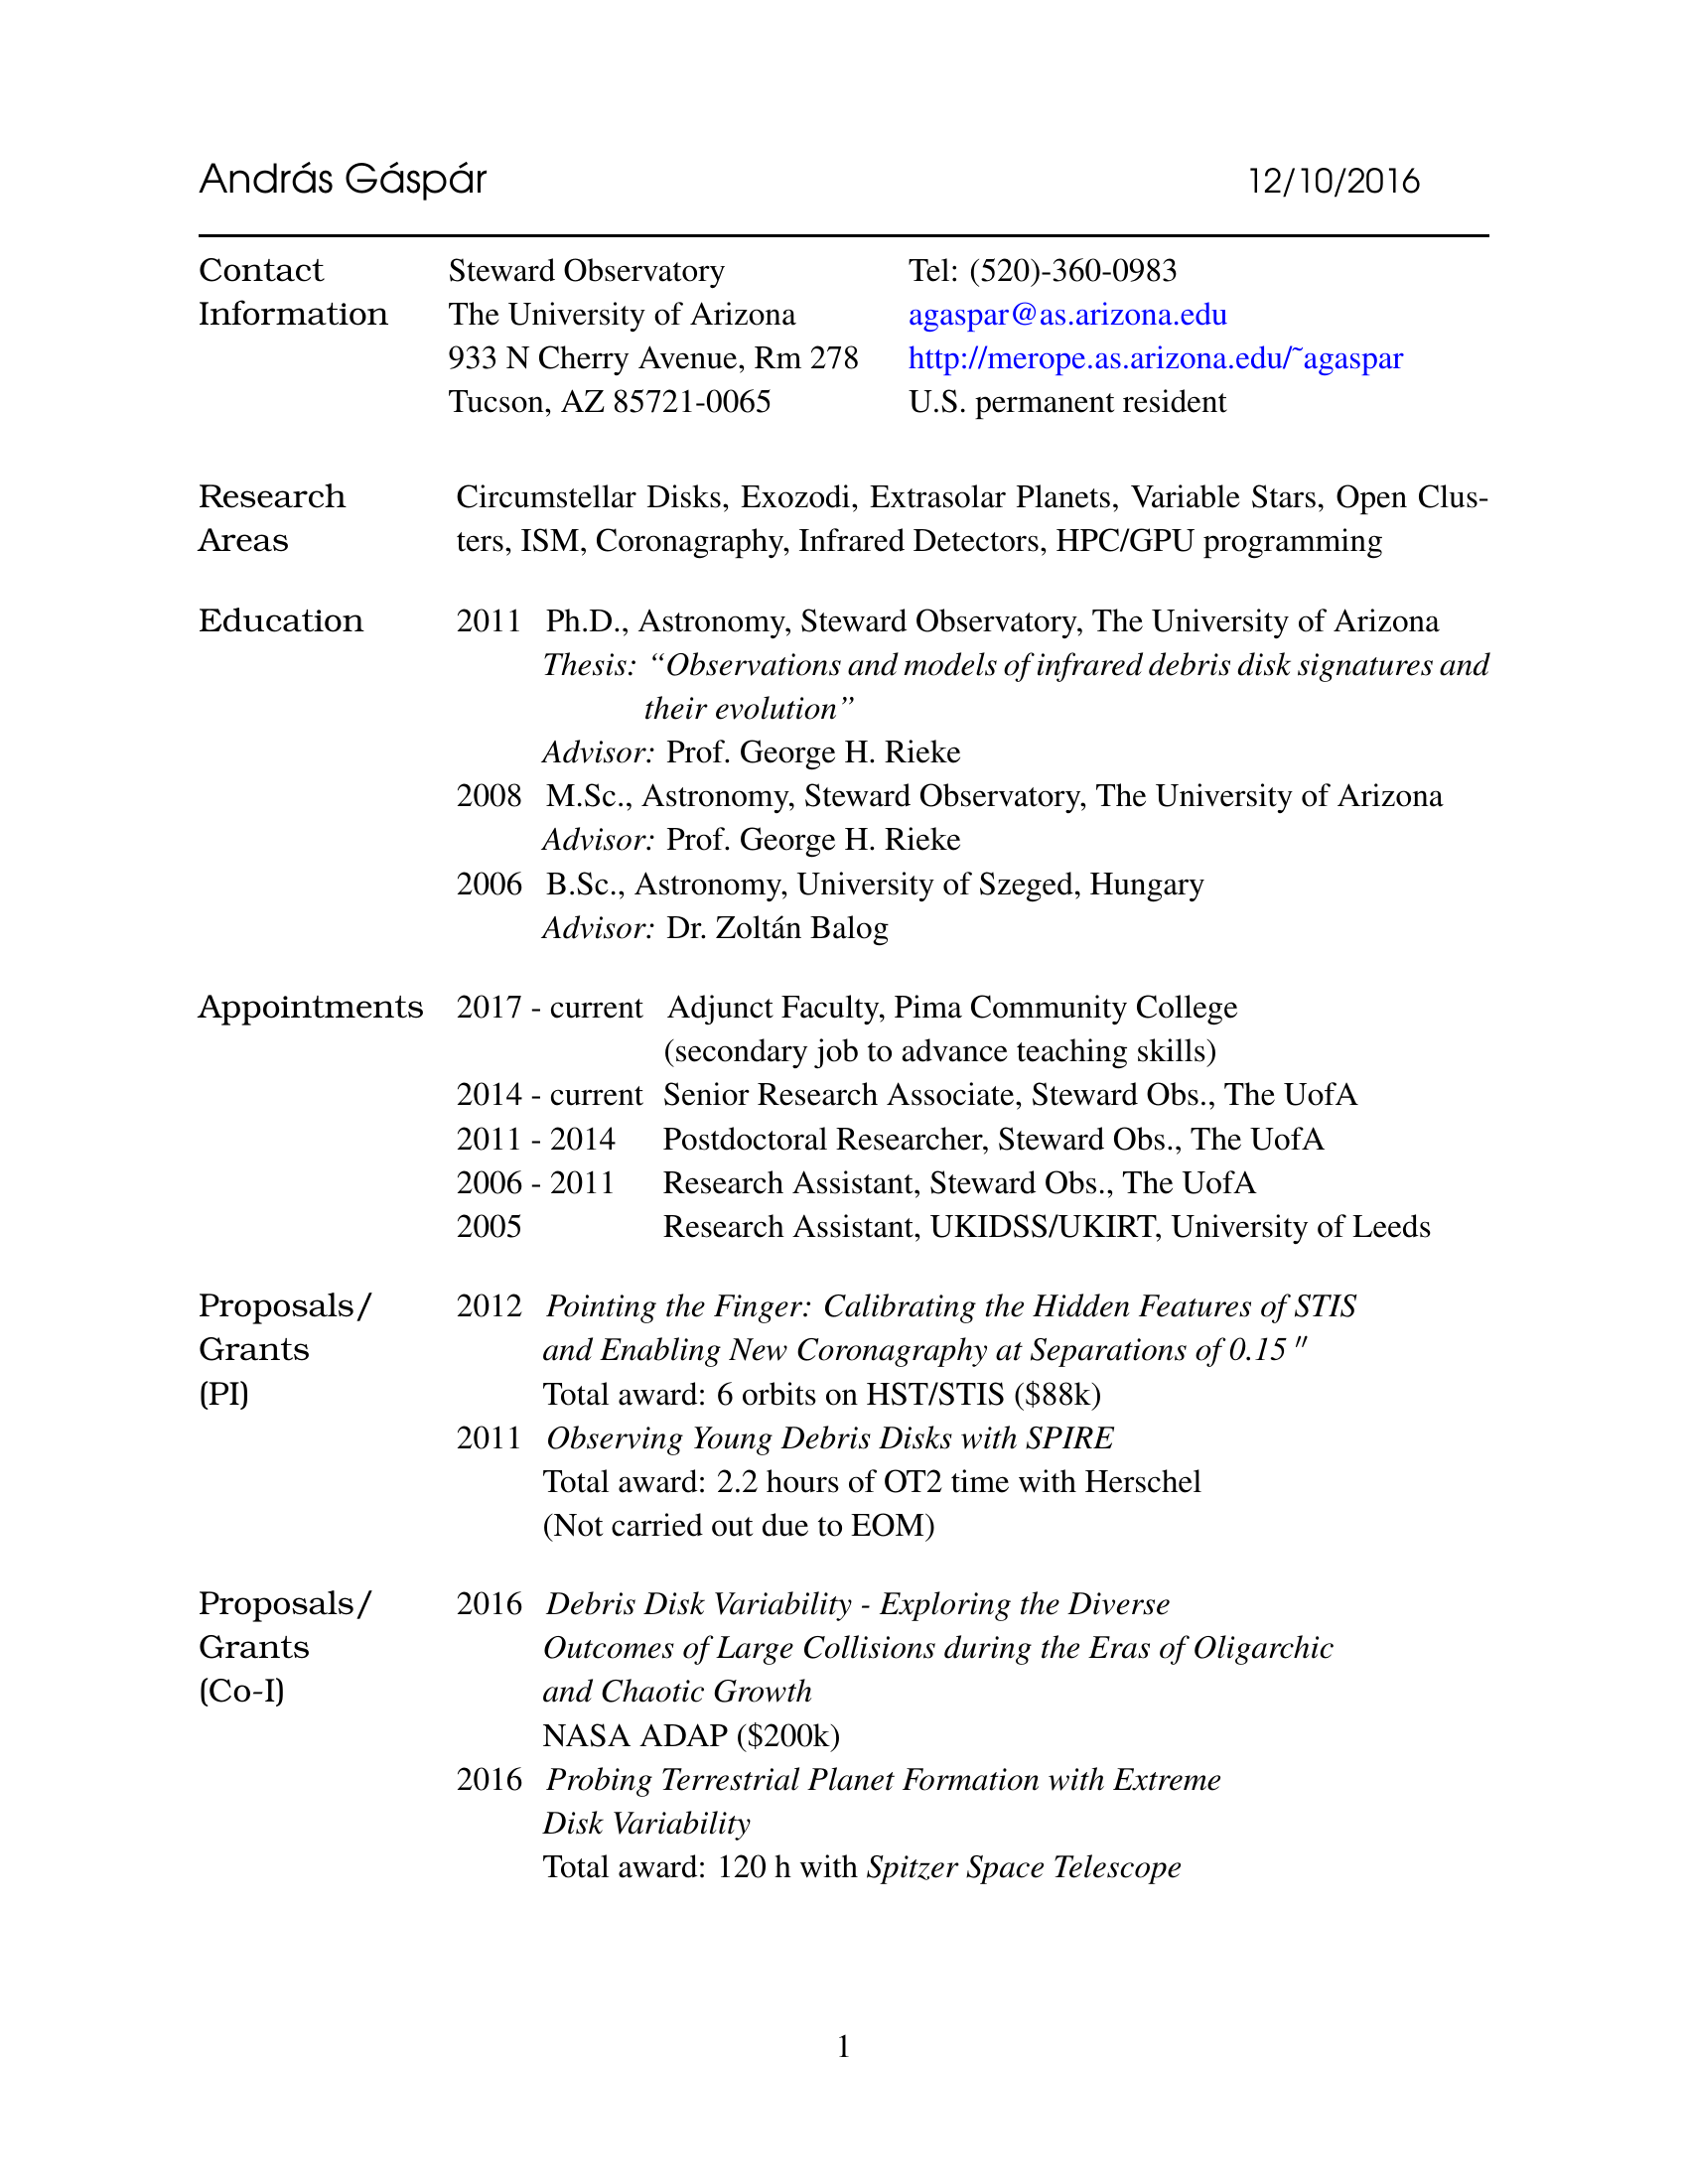

complete


In [4]:
images = convert_from_path('../input/cvpdfdata/agaspar_cv.pdf')
from IPython.display import display, Image
display(images[0])
print("complete")

In [5]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
print(bounds)
print("complete")

[([[198, 154], [498, 154], [498, 210], [198, 210]], 'Andras Gaspar', 0.9996983096737413), ([[1252, 161], [1435, 161], [1435, 204], [1252, 204]], '12/10/2016', 0.9979793446774254), ([[197, 255], [333, 255], [333, 291], [197, 291]], 'Contact', 0.9999947733979389), ([[449, 254], [737, 254], [737, 295], [449, 295]], 'Steward Observatory', 0.9149622845702049), ([[911, 255], [1191, 255], [1191, 293], [911, 293]], 'Tel: (520)-360-0983', 0.8890079546850399), ([[195, 299], [395, 299], [395, 335], [195, 335]], 'Information', 0.764337123210394), ([[447, 297], [807, 297], [807, 339], [447, 339]], 'The University of Arizona', 0.9939238831278918), ([[911, 301], [1241, 301], [1241, 341], [911, 341]], 'agaspar@as.arizona edu', 0.747557907030574), ([[447, 342], [871, 342], [871, 383], [447, 383]], '933 N Cherry Avenue, Rm 278', 0.757754460522259), ([[910, 343], [1421, 343], [1421, 386], [910, 386]], 'http:Ilmerope.as arizona edu/ agaspar', 0.7070764064149996), ([[447, 387], [783, 387], [783, 427], [447

<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7FEE493DD9D0>


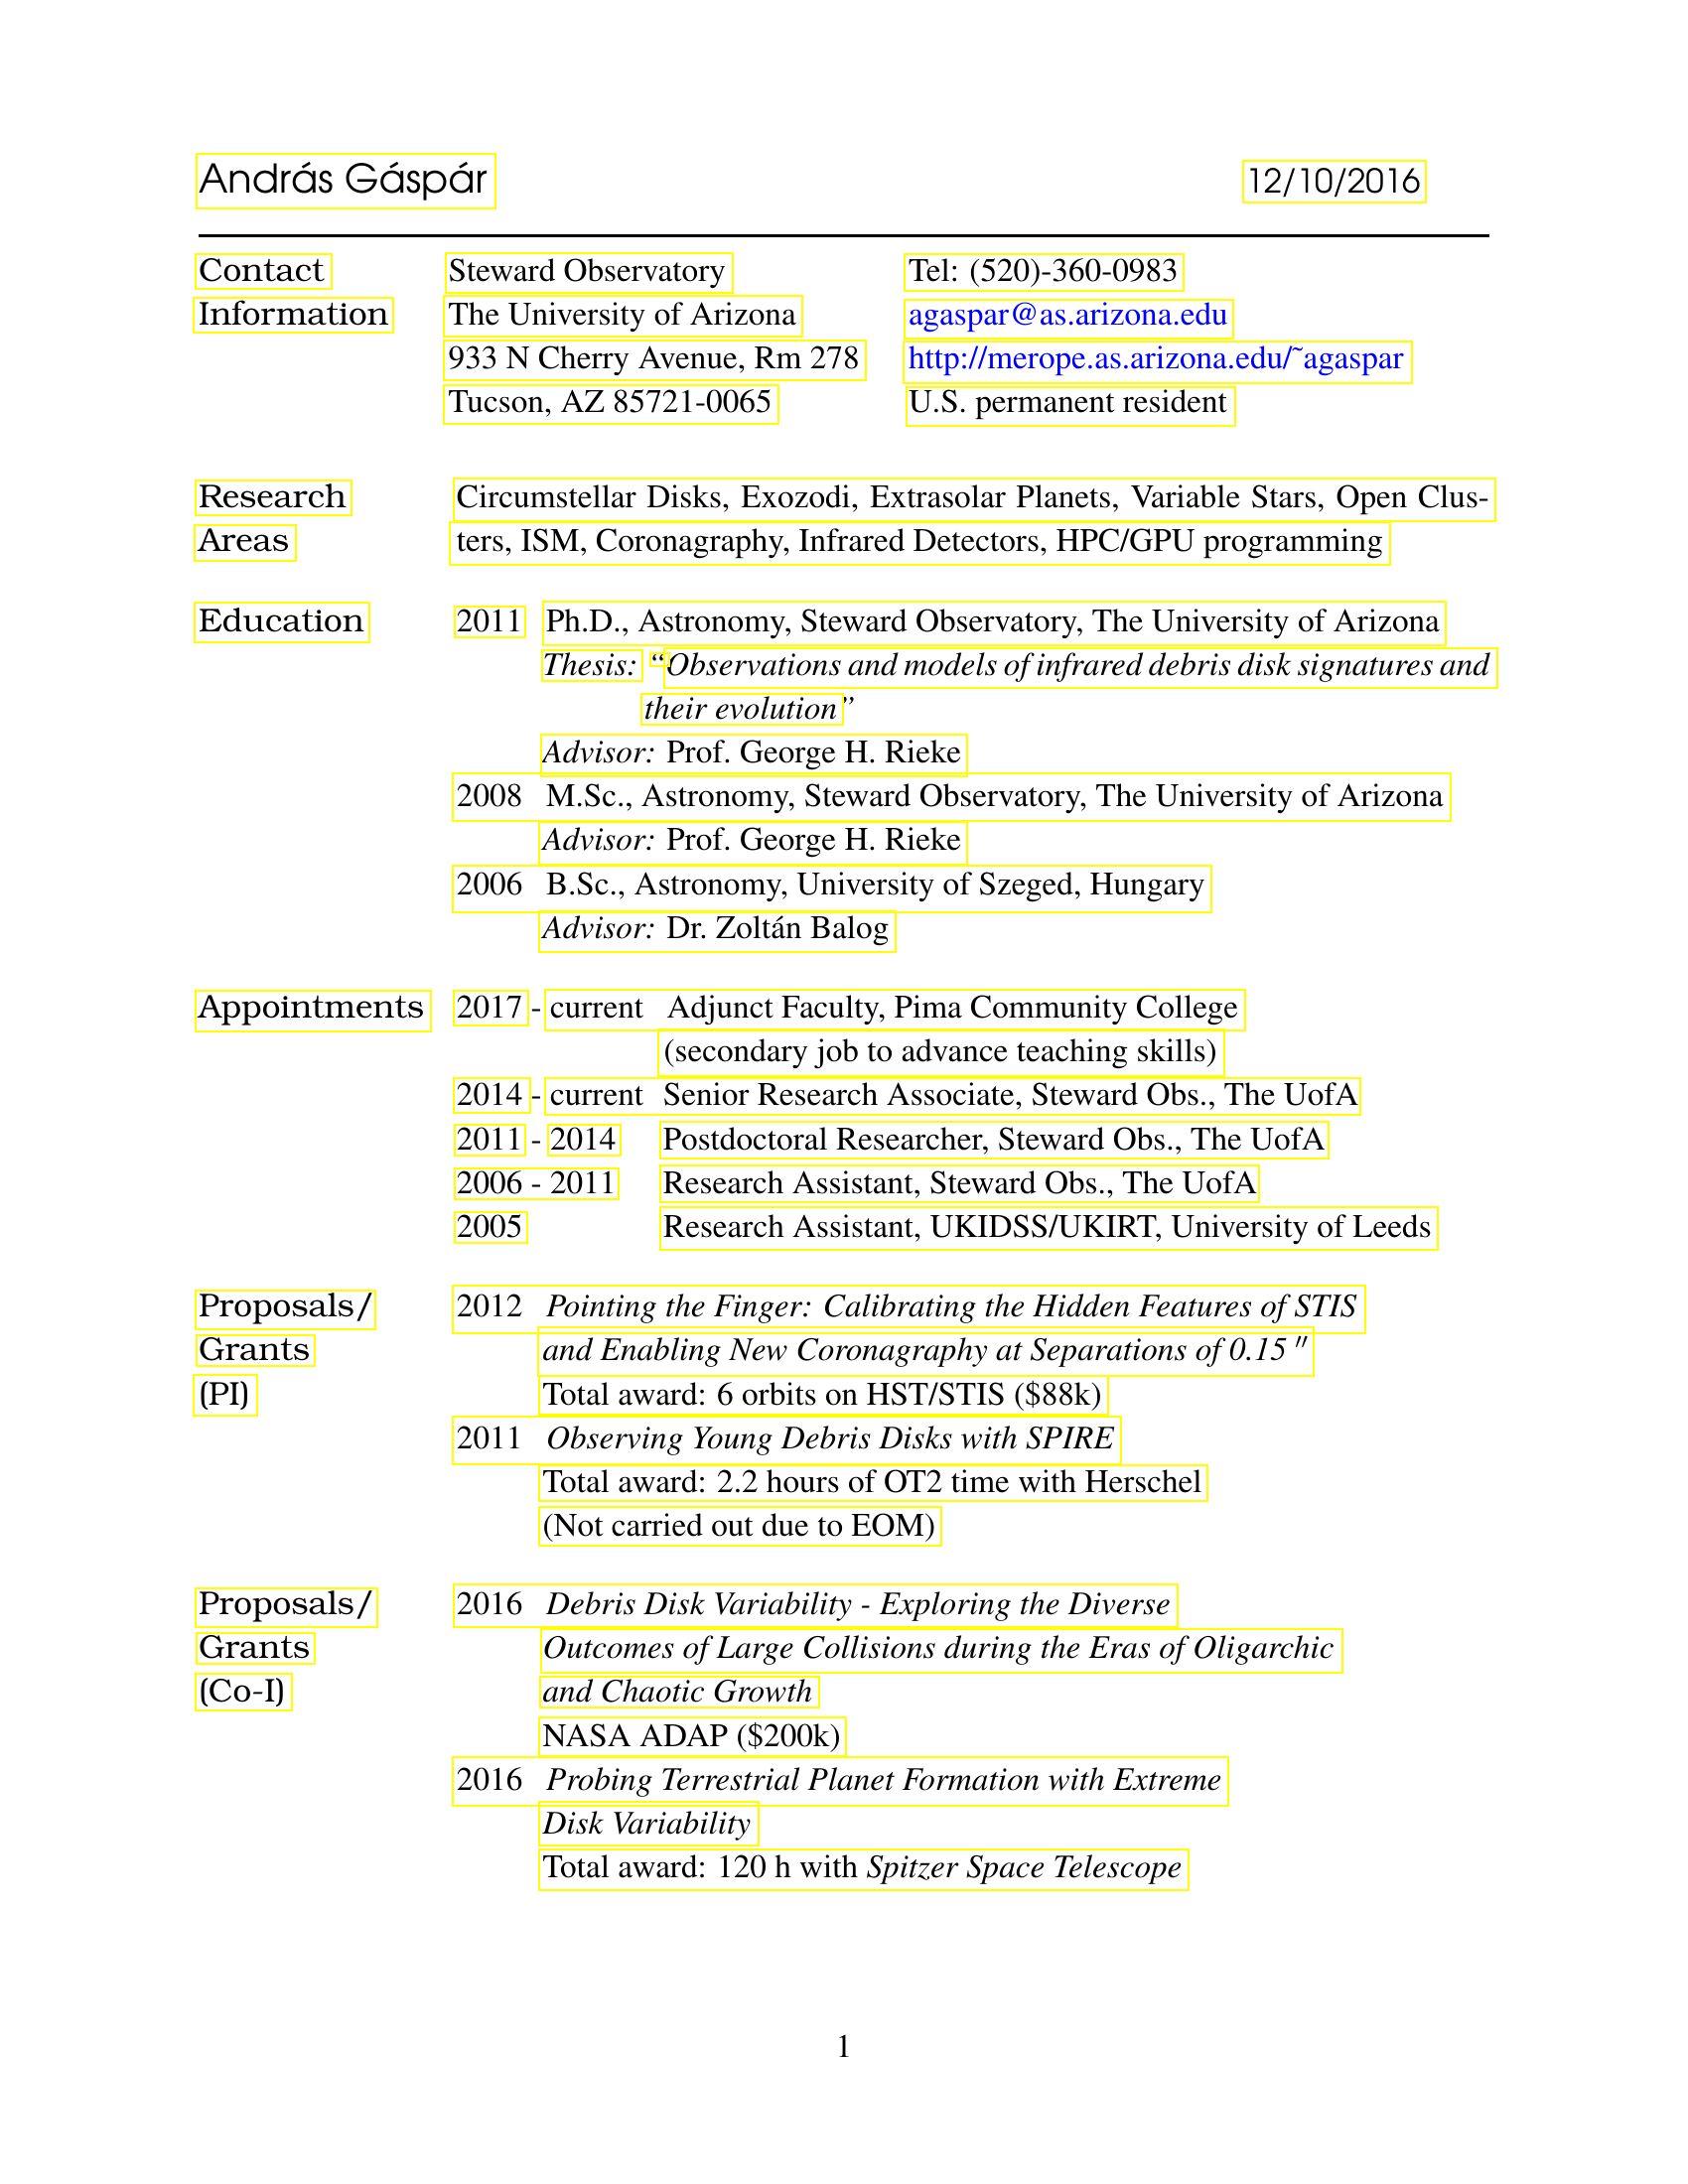

In [6]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

image001=draw_boxes(images[0], bounds)
print(image001)
image001

In [7]:
bounds[0][1]
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Andras Gaspar
12/10/2016
Contact
Steward Observatory
Tel: (520)-360-0983
Information
The University of Arizona
agaspar@as.arizona edu
933 N Cherry Avenue, Rm 278
http:Ilmerope.as arizona edu/ agaspar
Tucson, AZ 85721-0065
U.S. permanent resident
Research
Circumstellar Disks, Exozodi, Extrasolar Planets, Variable Stars, Open Clus-
Areas
ters, ISM, Coronagraphy, Infrared Detectors, HPCIGPU programming
Education
2011
Ph D, Astronomy, Steward Observatory, The University of Arizona
Thesis:
((
Observations and models of infrared debris disk signatures and
their evolution
Advisor: Prof. George H. Rieke
2008   M.Sc- Astronomy, Steward Observatory; The University of Arizona
Advisor: Prof. George H. Rieke
2006   B.Sc , Astronomy, University of Szeged, Hungary
Advisor: Dr: Zoltan Balog
Appointments
2017
current   Adjunct Faculty, Pima Community College
(secondary job to advance teaching skills)
2014
current   Senior Research Associate, Steward Obs , The UofA
2011
2014
Postdoctoral Researcher; Ste

In [8]:
nlp=spacy.load('en_core_web_sm')
doc = nlp(text)

from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)